# Impact of COVID-19 Pandemic on Mental Health

Data Source 2: Indicators of Anxiety or Depression Based on Reporoted Frequency of Symptoms During Last 7 Days
Rows: 4,734 Columns: 12

Reference: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm <br>
Access Dataset on Data.CDC.gov (Export to CSV, JSON, XLS, XML): https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp

This is a dataset from the Centers for Disease Control and Prevention, which involves surveys to show the percentage of adults reporting symptoms of anxiety or depression that appear to be related to a diagnosis of generalized anxiety disorder or major depressive disorder. The data is stratified by age, gender, race/ethnicity, education level, and state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# JSON datasouce pagination with url 
url = 'https://data.cdc.gov/resource/8pt5-q6wp.json?$limit=4467'
df = pd.read_json(url, encoding='utf-8')

In [3]:
# view dataframe
df.head()

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range
0,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,1,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,1,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,1,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   phase                4467 non-null   int64  
 1   indicator            4467 non-null   object 
 2   group                4467 non-null   object 
 3   state                4467 non-null   object 
 4   subgroup             4467 non-null   object 
 5   time_period          4467 non-null   int64  
 6   time_period_label    4467 non-null   object 
 7   value                4410 non-null   float64
 8   lowci                4410 non-null   float64
 9   highci               4410 non-null   float64
 10  confidence_interval  4410 non-null   object 
 11  quartile_range       3213 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 418.9+ KB


### (1-a) Correlation Between COVID-19 and Depression

In [5]:
# drop phase -1, and see the depression levels (values) during COVID-19
df[(df['phase'] != -1) & (df['group']=='National Estimate') & (df['indicator']=='Symptoms of Depressive Disorder')]

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range
0,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
210,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,2,May 7 - May 12,24.1,23.0,25.2,23.0 - 25.2,NaN
420,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,3,May 14 - May 19,24.4,23.7,25.2,23.7 - 25.2,NaN
630,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,4,May 21 - May 26,24.9,24.1,25.7,24.1 - 25.7,NaN
840,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,5,May 28 - June 2,25.3,24.7,25.8,24.7 - 25.8,NaN
1050,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,6,June 4 - June 9,25.8,25.0,26.7,25.0 - 26.7,NaN
1260,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,7,June 11 - June 16,25.1,24.3,25.9,24.3 - 25.9,NaN
1470,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,8,June 18 - June 23,25.6,25.0,26.3,25.0 - 26.3,NaN
1680,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,9,June 25 - June 30,26.9,26.1,27.7,26.1 - 27.7,NaN
1890,1,Symptoms of Depressive Disorder,National Estimate,United States,United States,10,July 2 - July 7,27.6,27.0,28.1,27.0 - 28.1,NaN


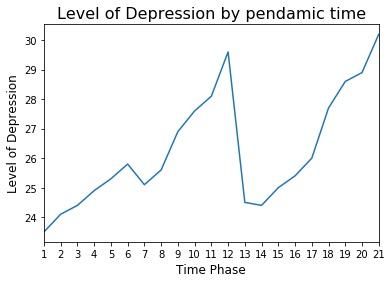

In [6]:
avg = df[(df['phase'] != -1)  & (df['group'] == 'National Estimate') & (df['indicator'] == 'Symptoms of Depressive Disorder')]
x = np.array(avg['time_period'])
y = np.array(avg['value'])
plt.xlim([1, 21])
plt.xticks(range(1, 22))
plt.plot(x, y)
plt.title('Level of Depression by pendamic time', fontsize=16)
plt.xlabel('Time Phase', fontsize=12)
plt.ylabel('Level of Depression', fontsize=12)
plt.show()

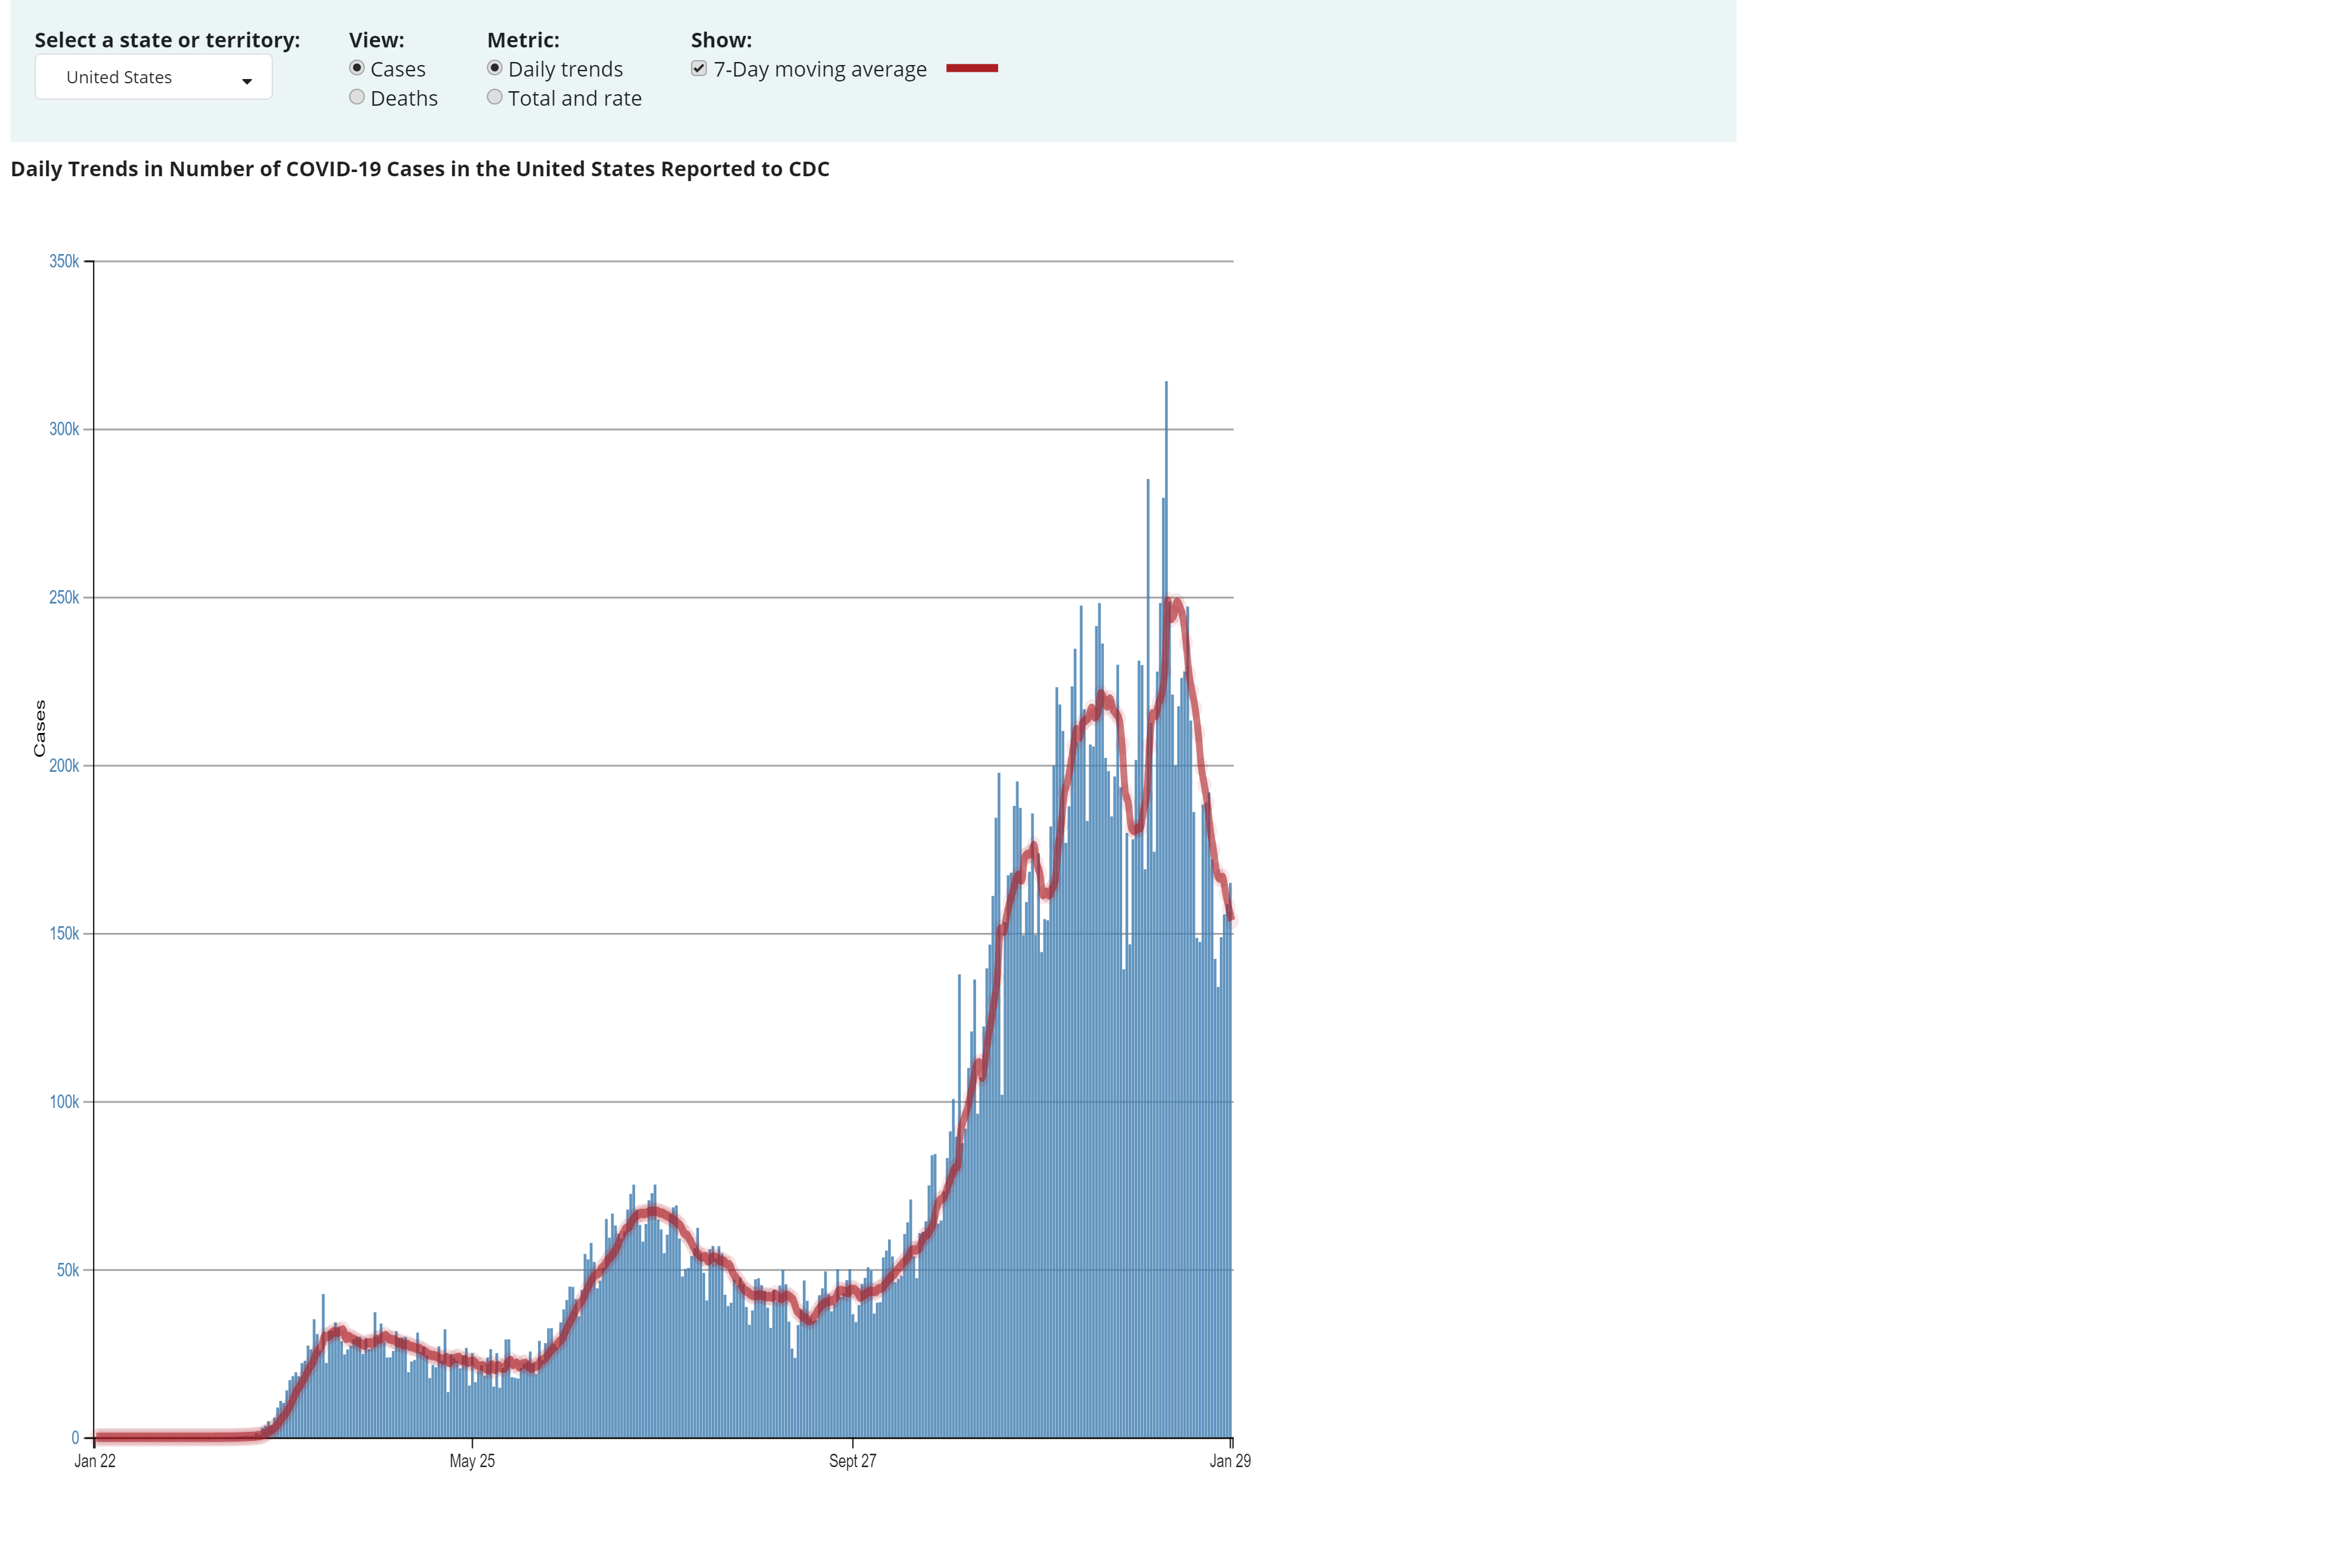

In [7]:
# U.S COVID-19 new cases by day / 7-day moving average 
# reference: https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases
from IPython.display import Image
Image(filename='us-state-trends.png')

###### Putting the two graphs together, depression are following a remarkably similar curve to Covid-19 cases

### (1-b) Depression Levels During the COVID-19 by Gender

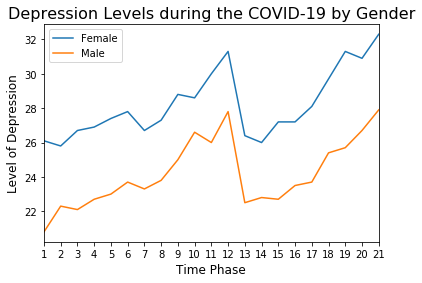

In [8]:
avg_f = df[(df['phase'] != -1) & (df['subgroup']=='Female') & (df['indicator']=='Symptoms of Depressive Disorder')]
avg_m = df[(df['phase'] != -1) & (df['subgroup']=='Male') & (df['indicator']=='Symptoms of Depressive Disorder')]
x = np.array(avg['time_period'])
y_f = np.array(avg_f['value'])
y_m = np.array(avg_m['value'])
plt.xlim([1, 21])
plt.xticks(range(1, 22))
plt.plot(x, y_f, label = 'Female')
plt.plot(x, y_m, label = 'Male')
plt.title('Depression Levels during the COVID-19 by Gender', fontsize=16)
plt.xlabel('Time Phase', fontsize=12)
plt.ylabel('Level of Depression', fontsize=12)
plt.legend()
plt.show()

###### Women suffer more with depression during months of COVID-19
Many studies support this fact. One example is as follow: https://economictimes.indiatimes.com/industry/miscellaneous/to-fuel-internet-proliferation-government-approves-setting-up-of-public-wi-fi-networks/public-wifi/slideshow/79937857.cms

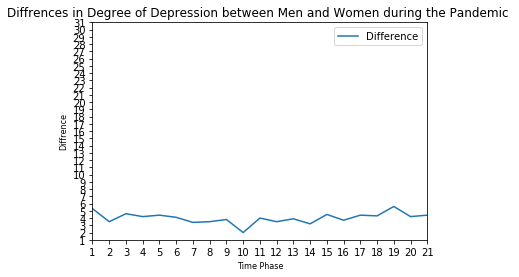

In [9]:
avg_f = df[(df['phase'] != -1) & (df['subgroup']=='Female') & (df['indicator']=='Symptoms of Depressive Disorder')]
avg_m = df[(df['phase'] != -1) & (df['subgroup']=='Male') & (df['indicator']=='Symptoms of Depressive Disorder')]
x = np.array(avg['time_period'])
y_f = np.array(avg_f['value'])
y_m = np.array(avg_m['value'])
y_d = np.array(y_f-y_m)
plt.xlim([1, 21])
plt.xticks(range(1, 22))
plt.ylim([1, 31])
plt.yticks(range(1, 32))
plt.plot(x, y_d, label = 'Difference')
plt.title('Diffrences in Degree of Depression between Men and Women during the Pandemic ', fontsize=12)
plt.xlabel('Time Phase', fontsize=8)
plt.ylabel('Diffrence', fontsize=8)
plt.legend()
plt.show()

It can be seen that the difference in the degree of depression between men and women is almost the same.
In other words, again, it shows correlation between COVID-19 and mental illness regardless of gender.

## Advanced visualization


In [10]:
df['subgroup'].unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female', 'Hispanic or Latino',
       'Non-Hispanic white, single race',
       'Non-Hispanic black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina

### (1-C) Depression Levels During the COVID-19 by Age

In [11]:
data = df[(df['group'] == 'By Age') | (df['group'] == 'By Education')]

In [12]:
data

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range
1,1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,1,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,1,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,1,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
5,1,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,Apr 23 - May 5,18.4,17.0,19.7,17.0 - 19.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4404,3,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,80 years and above,21,Dec 9 - Dec 21,28.3,22.2,35.0,22.2 - 35.0,NaN
4412,3,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Less than a high school diploma,21,Dec 9 - Dec 21,49.6,44.9,54.2,44.9 - 54.2,NaN
4413,3,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,High school diploma or GED,21,Dec 9 - Dec 21,44.7,42.5,46.8,42.5 - 46.8,NaN
4414,3,Symptoms of Anxiety Disorder or Depressive Dis...,By Education,United States,Some college/Associate's degree,21,Dec 9 - Dec 21,45.8,44.8,46.8,44.8 - 46.8,NaN


In [13]:
data_g = data.groupby(['subgroup']).mean()

In [14]:
df_age = df[df['group'] == 'By Age']
df_age_mean = df_age.groupby(['subgroup']).mean()
df_age_std = df_age.groupby(['subgroup']).std()

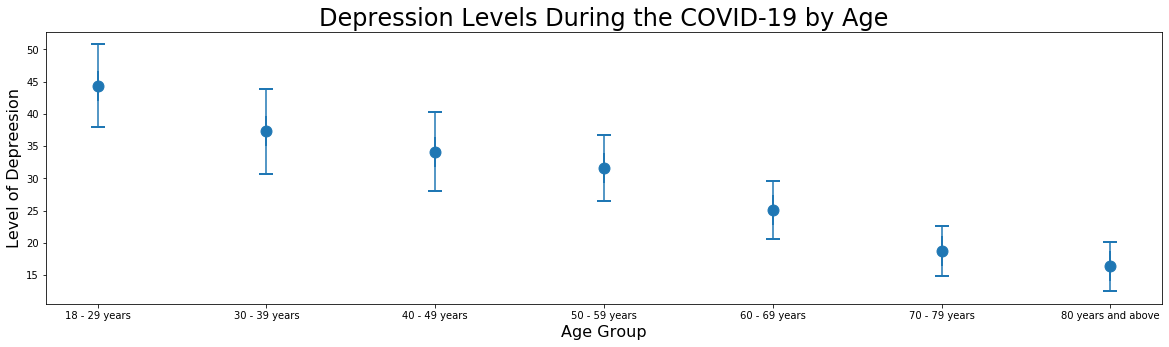

In [15]:
# plt error bar with the standard deviation
plt.figure(figsize=(20, 5))
plt.scatter(df_age_mean.index, df_age_mean['value'], s=120)
plt.errorbar(df_age_mean.index, df_age_mean['value'],yerr=df_age_std['value'],fmt='|', ms=30,mew=2,capthick=4,capsize=7)
plt.title('Depression Levels During the COVID-19 by Age', fontsize=24)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Level of Depreesion', fontsize=16)
plt.show()

###### Young people are more vulnerable to mental illness affected by pandemic (negative correlative)


### (1-d) Relationship between Mental Health and Education Level

In [16]:
df_edu = df[df['group'] == 'By Education']
df_edu_mean = df_edu.groupby(['subgroup']).mean()
df_edu_mean = df_edu_mean.reindex(index=['Less than a high school diploma', 'High school diploma or GED', "Some college/Associate's degree", "Bachelor's degree or higher"])

In [17]:
df_edu_mean

,phase,time_period,value,lowci,highci
subgroup,,,,,
Less than a high school diploma,1.5,10.545455,39.844444,35.463492,44.350794
High school diploma or GED,1.5,10.545455,33.284127,31.576190,35.028571
Some college/Associate's degree,1.5,10.545455,35.257143,34.034921,36.498413
Bachelor's degree or higher,1.5,10.545455,26.666667,25.823810,27.517460


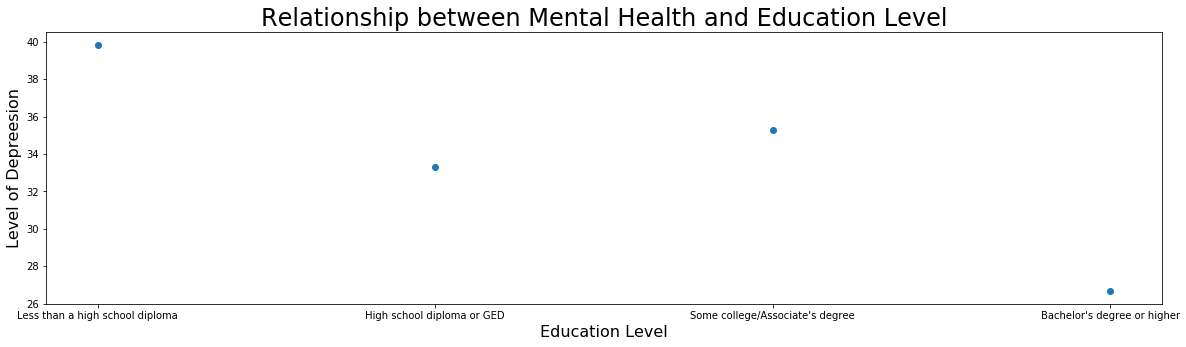

In [18]:
plt.figure(figsize=(20, 5))
plt.scatter(df_edu_mean.index, df_edu_mean['value'])
plt.title('Relationship between Mental Health and Education Level', fontsize=24)
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Level of Depreesion', fontsize=16)
plt.show()

###### Depressive symptoms are more prevalent among the less educated.

### (1-e) States with Depression Value
Reference: https://altair-viz.github.io/gallery/us_state_capitals.html

In [19]:
df[(df['phase'] != -1) & (df['time_period']== 21) & (df['group'] == 'By State') & (df['indicator'] == 'Symptoms of Depressive Disorder')]

,phase,indicator,group,state,subgroup,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range
4276,3,Symptoms of Depressive Disorder,By State,Alabama,Alabama,21,Dec 9 - Dec 21,35.1,30.0,40.5,30.0 - 40.5,32.4-39.4
4277,3,Symptoms of Depressive Disorder,By State,Alaska,Alaska,21,Dec 9 - Dec 21,32.0,28.0,36.2,28.0 - 36.2,29.7-32.3
4278,3,Symptoms of Depressive Disorder,By State,Arizona,Arizona,21,Dec 9 - Dec 21,32.7,28.3,37.4,28.3 - 37.4,32.4-39.4
4279,3,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,21,Dec 9 - Dec 21,28.3,23.1,33.9,23.1 - 33.9,26.6-29.6
4280,3,Symptoms of Depressive Disorder,By State,California,California,21,Dec 9 - Dec 21,31.4,28.5,34.3,28.5 - 34.3,29.7-32.3
4281,3,Symptoms of Depressive Disorder,By State,Colorado,Colorado,21,Dec 9 - Dec 21,30.3,26.5,34.2,26.5 - 34.2,29.7-32.3
4282,3,Symptoms of Depressive Disorder,By State,Connecticut,Connecticut,21,Dec 9 - Dec 21,29.0,24.5,33.8,24.5 - 33.8,26.6-29.6
4283,3,Symptoms of Depressive Disorder,By State,Delaware,Delaware,21,Dec 9 - Dec 21,30.4,25.8,35.4,25.8 - 35.4,29.7-32.3
4284,3,Symptoms of Depressive Disorder,By State,District of Columbia,District of Columbia,21,Dec 9 - Dec 21,22.6,17.6,28.3,17.6 - 28.3,21.1-26.5
4285,3,Symptoms of Depressive Disorder,By State,Florida,Florida,21,Dec 9 - Dec 21,28.1,24.4,31.9,24.4 - 31.9,26.6-29.6


In [20]:
df_geo = df[df['group'] == 'By State']
df_geo_mean = df_geo.groupby(['subgroup']).mean()

In [21]:
# Altair can be installed, along with the datasets in vega_datasets, 
# using: $ pip install altair vega_datasets
import altair as alt
from vega_datasets import data

# U.S. state capitals overlyaed on a map of the U.S.
states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url
df_cap = pd.read_json(capitals)

In [22]:
df_merge = pd.merge(df_geo_mean, df_cap, how='left', left_on='subgroup', right_on='state')

In [23]:
df_merge

,phase,time_period,value,lowci,highci,lon,lat,state,city
0,1.619048,11.0,32.120635,27.438095,37.104762,-86.279118,32.361538,Alabama,Montgomery
1,1.619048,11.0,31.158730,27.103175,35.447619,-134.419740,58.301935,Alaska,Juneau
2,1.619048,11.0,33.528571,29.595238,37.642857,-112.073844,33.448457,Arizona,Phoenix
3,1.619048,11.0,33.865079,29.239683,38.741270,-92.331122,34.736009,Arkansas,Little Rock
4,1.619048,11.0,34.461905,31.566667,37.471429,-121.468926,38.555605,California,Sacramento
5,1.619048,11.0,32.246032,28.358730,36.355556,-104.984167,39.739167,Colorado,Denver
6,1.619048,11.0,30.952381,26.711111,35.450794,-72.677000,41.767000,Connecticut,Hartford
7,1.619048,11.0,29.133333,24.384127,34.271429,-75.526755,39.161921,Delaware,Dover
8,1.619048,11.0,32.247619,26.346032,38.644444,NaN,NaN,NaN,NaN
9,1.619048,11.0,33.809524,30.360317,37.388889,-84.272770,30.451800,Florida,Tallahassee


In [24]:
df_merge.rename(columns={"city":"capital"})
df_merge.dropna(inplace=True) # df_merge.dropna
df_merge['value'] = np.round(df_merge['value'], 3) #

In [25]:
import altair as alt
from vega_datasets import data

airports = data.airports.url
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='Depression Level of US State Capitols During the Pandemic',
    width=800,
    height=600
).project('albersUsa')

background

points = alt.Chart(df_merge).mark_circle(size=20).encode(
    longitude='lon:Q',
    latitude='lat:Q',
#     size='Value:Q',
    size = alt.Size('value', scale=alt.Scale(range=[20, 80])),
    color=alt.value('steelblue'),
    tooltip=['state', 'value']
)

# points
background + points

alt.LayerChart(...)

Thank you :)